In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import web_scraping as ws

%config InlineBackend.figure_format = 'png'
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('seaborn-colorblind')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)

pd.options.mode.chained_assignment = None

In [ ]:
# Put in data_cleaning module

def find_unique_genres(df):
    unique_genres = []
    genres_list_of_lists = df['genres'].value_counts().index.to_list()
    for genres_list in genres_list_of_lists:
        unique_genres += genres_list
#     unique_genres_set = set(unique_genres)
    return set(unique_genres)

# def clean_unique_genres_set(unique_genres_set):
#     cleaned_set = set()
#     for genre in unique_genres_set:
#         cleaned_set.add(genre.strip())
#     return cleaned_set

In [2]:
with open('combined_movie_df_6.pickle', 'rb') as read_file:
    movie_df = pickle.load(read_file)

In [8]:
movie_df[movie_df.global_gross.isna()].groupby('country').size()

country
Japan         796
Japan, USA     58
USA           942
dtype: int64

In [10]:
movie_df = movie_df.dropna(subset=['global_gross'])

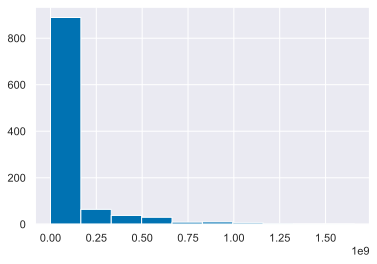

In [14]:
movie_df.global_gross.hist();

In [116]:
main_features = ['title', 'country', 'runtime_minutes', 'budget',
                 'mpaa_rating', 'genres', 'years_since_release',
                 'imdb_user_rating', 'imdb_user_rating_count', 'oscar_wins',
                 'non_oscar_wins', 'metascore', 'global_gross']

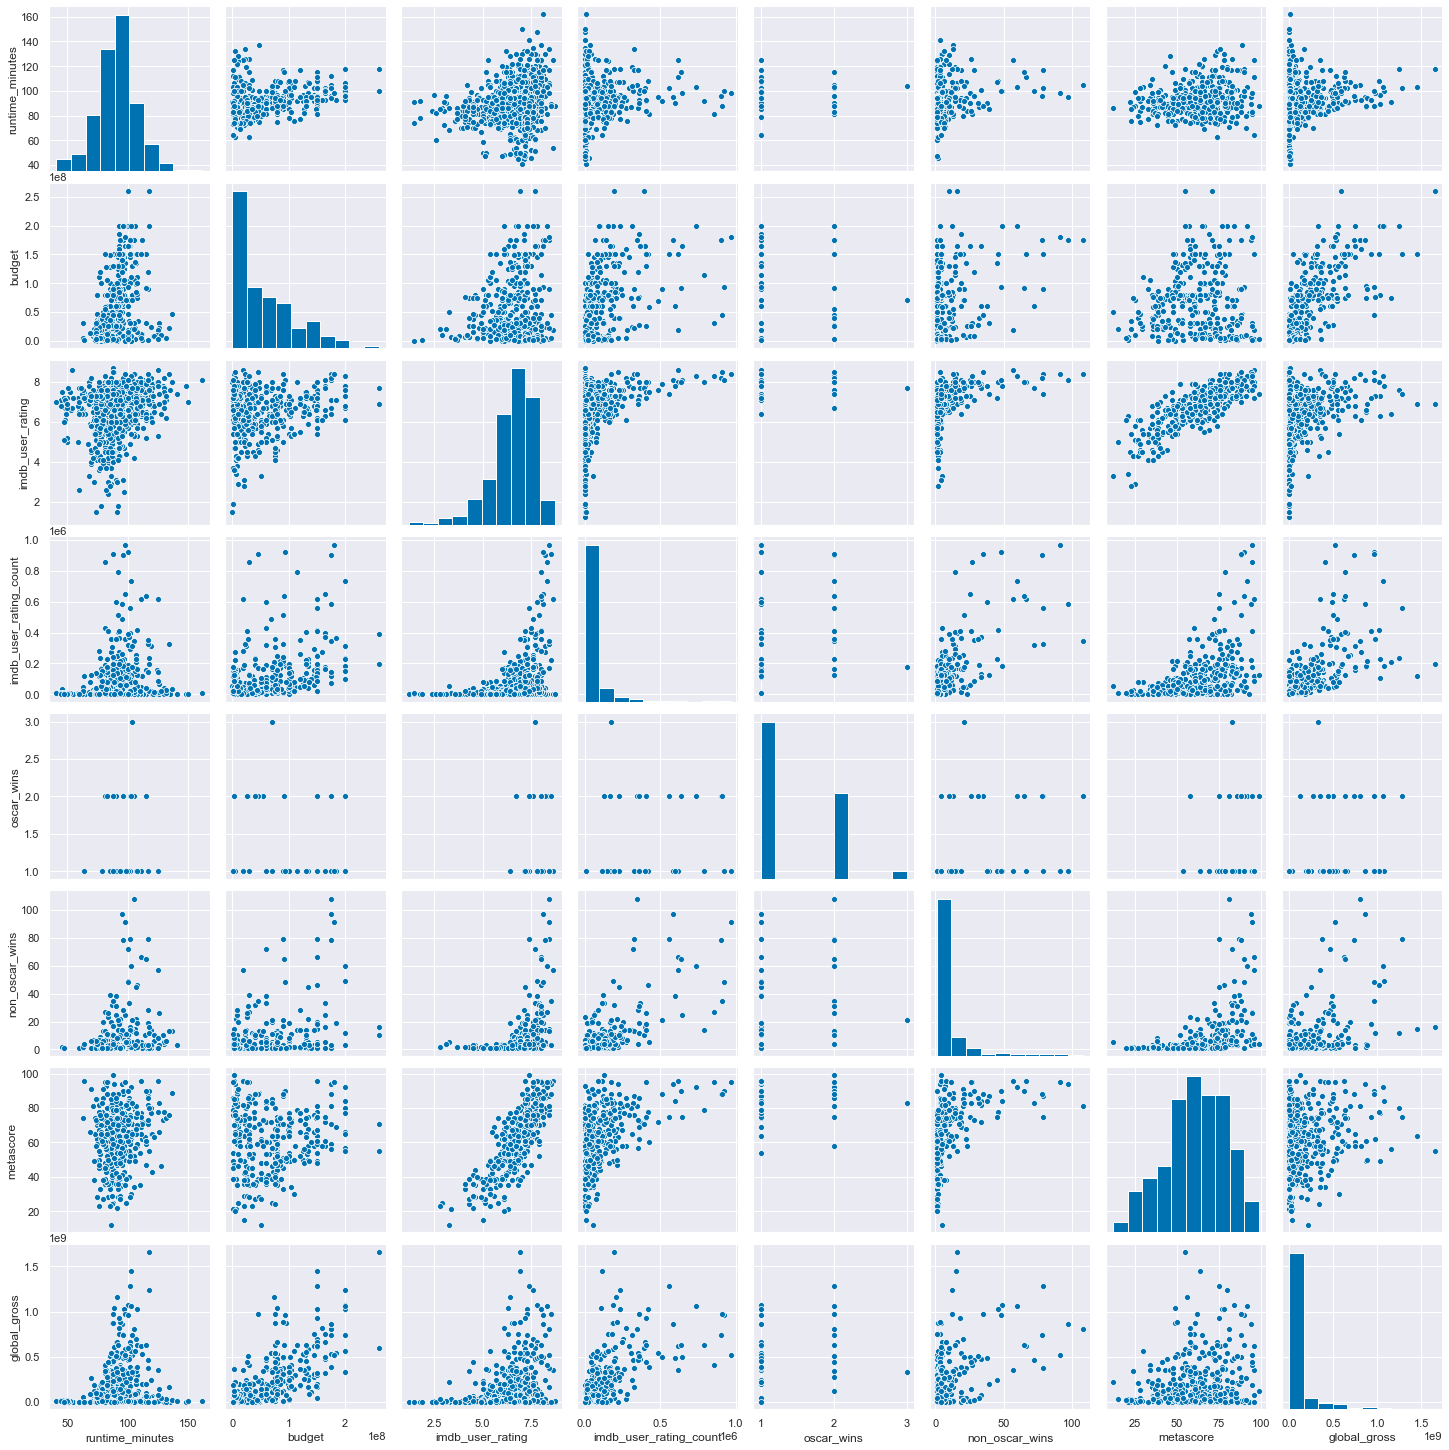

In [25]:
sns.pairplot(movie_df[main_features]);

In [33]:
movie_df.shape

(1050, 39)

In [26]:
movie_df.describe()

,runtime_minutes,budget,global_gross,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,primary_release_year
count,921.00,4.23e+02,1.05e+03,1032.00,1032.00,32.00,365.00,409.00,1050.00,1050.00,1050.0,1.05e+03,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.0,1050.00,1050.0,1050.0,1050.00,1050.00,1050.00,1050.00,1.05e+03,965.00
mean,91.09,5.69e+07,8.83e+07,6.50,44406.48,1.41,8.39,61.22,0.32,0.58,1.0,6.67e-03,0.45,0.04,0.21,0.58,0.46,0.01,0.03,0.02,0.1,0.08,0.0,0.1,0.28,0.03,0.08,0.02,5.71e-03,2007.96
std,16.40,5.40e+07,1.97e+08,1.13,111102.94,0.56,15.08,18.00,0.47,0.49,0.0,8.14e-02,0.50,0.20,0.41,0.49,0.50,0.12,0.16,0.16,0.3,0.27,0.0,0.3,0.45,0.16,0.27,0.14,7.54e-02,11.55
min,41.00,4.00e+00,6.62e+02,1.20,5.00,1.00,1.00,12.00,0.00,0.00,1.0,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00e+00,1938.00
25%,82.00,1.06e+07,1.00e+06,6.00,363.25,1.00,1.00,49.00,0.00,0.00,1.0,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00e+00,2004.00
50%,91.00,3.80e+07,8.96e+06,6.70,2526.00,1.00,3.00,62.00,0.00,1.00,1.0,0.00e+00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00e+00,2011.00
75%,100.00,8.50e+07,6.05e+07,7.30,30248.50,2.00,7.00,74.00,1.00,1.00,1.0,0.00e+00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.00,0.00e+00,2016.00
max,162.00,2.60e+08,1.66e+09,8.70,968505.00,3.00,108.00,99.00,1.00,1.00,1.0,1.00e+00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,0.0,1.0,1.00,1.00,1.00,1.00,1.00e+00,2020.00


In [32]:
movie_df.groupby('country').size()

country
Japan         496
Japan, USA     80
USA           474
dtype: int64

In [28]:
movie_df[main_features].corr()

,runtime_minutes,budget,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,global_gross
runtime_minutes,1.00,0.30,0.24,0.11,-0.06,0.20,0.17,0.14
budget,0.30,1.00,0.19,0.47,-0.16,0.31,0.09,0.71
imdb_user_rating,0.24,0.19,1.00,0.31,0.15,0.42,0.81,0.18
imdb_user_rating_count,0.11,0.47,0.31,1.00,0.06,0.71,0.47,0.72
oscar_wins,-0.06,-0.16,0.15,0.06,1.00,0.03,0.12,0.14
non_oscar_wins,0.20,0.31,0.42,0.71,0.03,1.00,0.47,0.48
metascore,0.17,0.09,0.81,0.47,0.12,0.47,1.00,0.18
global_gross,0.14,0.71,0.18,0.72,0.14,0.48,0.18,1.00


In [34]:
movie_df = movie_df[movie_df.country != 'Japan, USA']

In [72]:
datetime.datetime.today().day

14

In [101]:
with open('cleaned_combined_movie_df.pickle', 'wb') as to_write:
    pickle.dump(movie_df, to_write)

In [196]:
with open('cleaned_japan_df.pickle', 'wb') as to_write:
    pickle.dump(japan_df, to_write)

In [180]:
with open('cleaned_usa_df.pickle', 'wb') as to_write:
    pickle.dump(usa_df, to_write)

In [41]:
movie_df['years_since_release'] = datetime.datetime.today().year - movie_df['primary_release_year']

<ipython-input-41-3613369123d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['years_since_release'] = datetime.datetime.today().year - movie_df['primary_release_year']


In [53]:
movie_df['release_month'] = movie_df['primary_release_date'].dt.month

<ipython-input-53-70191e92743f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['release_month'] = movie_df['primary_release_date'].dt.month


In [73]:
movie_df['release_month_day_decimal'] = movie_df['release_month'] + movie_df['primary_release_date'].dt.day / 100

In [58]:
movie_df['is_summer_release'] = np.where((movie_df['release_month'] >= 6) & (movie_df['release_month'] <= 8), 1, 0)

In [63]:
movie_df['is_xmas_release'] = np.where(movie_df['release_month'] == 12, 1, 0)

In [79]:
movie_df['is_golden_week_release'] = np.where(
    (movie_df['release_month_day_decimal'] >= 4.26) & (movie_df['release_month_day_decimal'] <= 5.07), 1, 0)

In [99]:
movie_df.rename(columns={'primary_release_date': 'release_date'}, inplace=True)

In [96]:
cols = ['title',
        'country',
        'runtime_minutes',
        'budget',
        'global_gross',
        'mpaa_rating',
        'genres',
        'imdb_user_rating',
        'imdb_user_rating_count',
        'oscar_wins',
        'non_oscar_wins',
        'metascore',
        'primary_release_date',
        'years_since_release',
        'is_golden_week_release',
        'is_summer_release',
        'is_xmas_release',        
        'is_Action',
        'is_Adventure',
        'is_Animation',
        'is_Biography',
        'is_Comedy',
        'is_Crime',
        'is_Drama',
        'is_Family',
        'is_Fantasy',
        'is_History',
        'is_Horror',
        'is_Music',
        'is_Musical',
        'is_Mystery',
        'is_News',
        'is_Romance',
        'is_Sci-Fi',
        'is_Sport',
        'is_Thriller',
        'is_War',
        'is_Western']

In [90]:
movie_df.drop(columns=['japan_release_date', 'usa_release_date',
                       'other_release_date', 'other_release_date_country',
                       'release_month', 'release_month_day_decimal', 'primary_release_year'], inplace=True)

KeyError: "['japan_release_date' 'usa_release_date' 'other_release_date'\n 'other_release_date_country' 'release_month' 'release_month_day_decimal'\n 'primary_release_year'] not found in axis"

In [106]:
japan_df = movie_df[movie_df['country'] == 'Japan']
usa_df = movie_df[movie_df['country'] == 'USA']

In [119]:
usa_df.describe()

,runtime_minutes,budget,global_gross,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western
count,435.00,3.32e+02,4.74e+02,472.00,472.00,31.00,238.00,298.00,474.00,474.00,474.00,474.00,474.00,474.00,474.0,4.74e+02,474.00,474.00,474.00,474.0,474.00,474.00,4.74e+02,474.00,474.0,474.00,474.0,474.00,474.00,474.00,474.00,474.00,474.00
mean,87.41,6.39e+07,1.58e+08,6.12,80390.79,1.42,10.06,60.48,13.74,0.02,0.31,0.07,0.13,0.69,1.0,6.33e-03,0.64,0.03,0.14,0.8,0.47,0.01,8.44e-03,0.03,0.2,0.05,0.0,0.09,0.16,0.02,0.03,0.02,0.01
std,11.08,5.63e+07,2.54e+08,1.31,147927.39,0.56,17.51,17.90,13.73,0.14,0.46,0.26,0.33,0.46,0.0,7.94e-02,0.48,0.18,0.35,0.4,0.50,0.10,9.16e-02,0.17,0.4,0.22,0.0,0.29,0.37,0.15,0.17,0.13,0.10
min,47.00,4.00e+00,2.40e+03,1.20,5.00,1.00,1.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00e+00,0.00,0.00,0.00,0.0,0.00,0.00,0.00e+00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,80.00,1.50e+07,1.91e+06,5.40,1334.75,1.00,1.00,48.00,4.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00e+00,0.00,0.00,0.00,1.0,0.00,0.00,0.00e+00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
50%,87.00,5.00e+07,3.59e+07,6.40,18132.50,1.00,3.00,61.00,10.00,0.00,0.00,0.00,0.00,1.00,1.0,0.00e+00,1.00,0.00,0.00,1.0,0.00,0.00,0.00e+00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
75%,94.00,9.90e+07,2.13e+08,7.10,95767.75,2.00,10.00,74.00,18.00,0.00,1.00,0.00,0.00,1.00,1.0,0.00e+00,1.00,0.00,0.00,1.0,1.00,0.00,0.00e+00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
max,132.00,2.60e+08,1.66e+09,8.50,968505.00,3.00,108.00,99.00,82.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00e+00,1.00,1.00,1.00,1.0,1.00,1.00,1.00e+00,1.00,1.0,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00


In [104]:
movie_df.groupby('country').size()

country
Japan    496
USA      474
dtype: int64

In [123]:
japan_df[japan_df.oscar_wins == 1]

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western
855,Spirited Away,Japan,125.0,1.90e+07,3.51e+08,PG,"[Animation, Adventure, Family, Fantasy, Mystery]",8.6,619245.0,1.0,57.0,96.0,2001-07-20,19.0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0


In [127]:
japan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 2 to 1274
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   496 non-null    object        
 1   country                 496 non-null    object        
 2   runtime_minutes         418 non-null    float64       
 3   budget                  45 non-null     float64       
 4   global_gross            496 non-null    float64       
 5   mpaa_rating             113 non-null    object        
 6   genres                  496 non-null    object        
 7   imdb_user_rating        480 non-null    float64       
 8   imdb_user_rating_count  480 non-null    float64       
 9   oscar_wins              1 non-null      float64       
 10  non_oscar_wins          99 non-null     float64       
 11  metascore               67 non-null     float64       
 12  release_date            491 non-null    datetime6

In [172]:
usa_df[main_features].corr()

,runtime_minutes,budget,years_since_release,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,global_gross
runtime_minutes,1.00,0.45,-0.17,0.23,0.33,0.19,0.34,0.09,0.45
budget,0.45,1.00,-0.24,0.27,0.49,0.19,0.36,0.13,0.72
years_since_release,-0.17,-0.24,1.00,0.29,0.08,0.17,-0.03,0.29,-0.10
imdb_user_rating,0.23,0.27,0.29,1.00,0.51,0.30,0.42,0.82,0.39
imdb_user_rating_count,0.33,0.49,0.08,0.51,1.00,0.57,0.72,0.53,0.71
oscar_wins,0.19,0.19,0.17,0.30,0.57,1.00,0.65,0.41,0.39
non_oscar_wins,0.34,0.36,-0.03,0.42,0.72,0.65,1.00,0.50,0.52
metascore,0.09,0.13,0.29,0.82,0.53,0.41,0.50,1.00,0.26
global_gross,0.45,0.72,-0.10,0.39,0.71,0.39,0.52,0.26,1.00


In [121]:
japan_df[main_features].corr()

,runtime_minutes,budget,years_since_release,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,global_gross
runtime_minutes,1.00,0.23,-0.14,0.17,0.14,NaN,0.27,0.22,0.19
budget,0.23,1.00,-0.05,-0.27,-0.03,NaN,0.18,-0.17,0.12
years_since_release,-0.14,-0.05,1.00,0.14,0.22,NaN,0.03,0.12,0.03
imdb_user_rating,0.17,-0.27,0.14,1.00,0.29,NaN,0.41,0.72,0.16
imdb_user_rating_count,0.14,-0.03,0.22,0.29,1.00,NaN,0.73,0.45,0.62
oscar_wins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non_oscar_wins,0.27,0.18,0.03,0.41,0.73,NaN,1.00,0.43,0.69
metascore,0.22,-0.17,0.12,0.72,0.45,NaN,0.43,1.00,0.15
global_gross,0.19,0.12,0.03,0.16,0.62,NaN,0.69,0.15,1.00


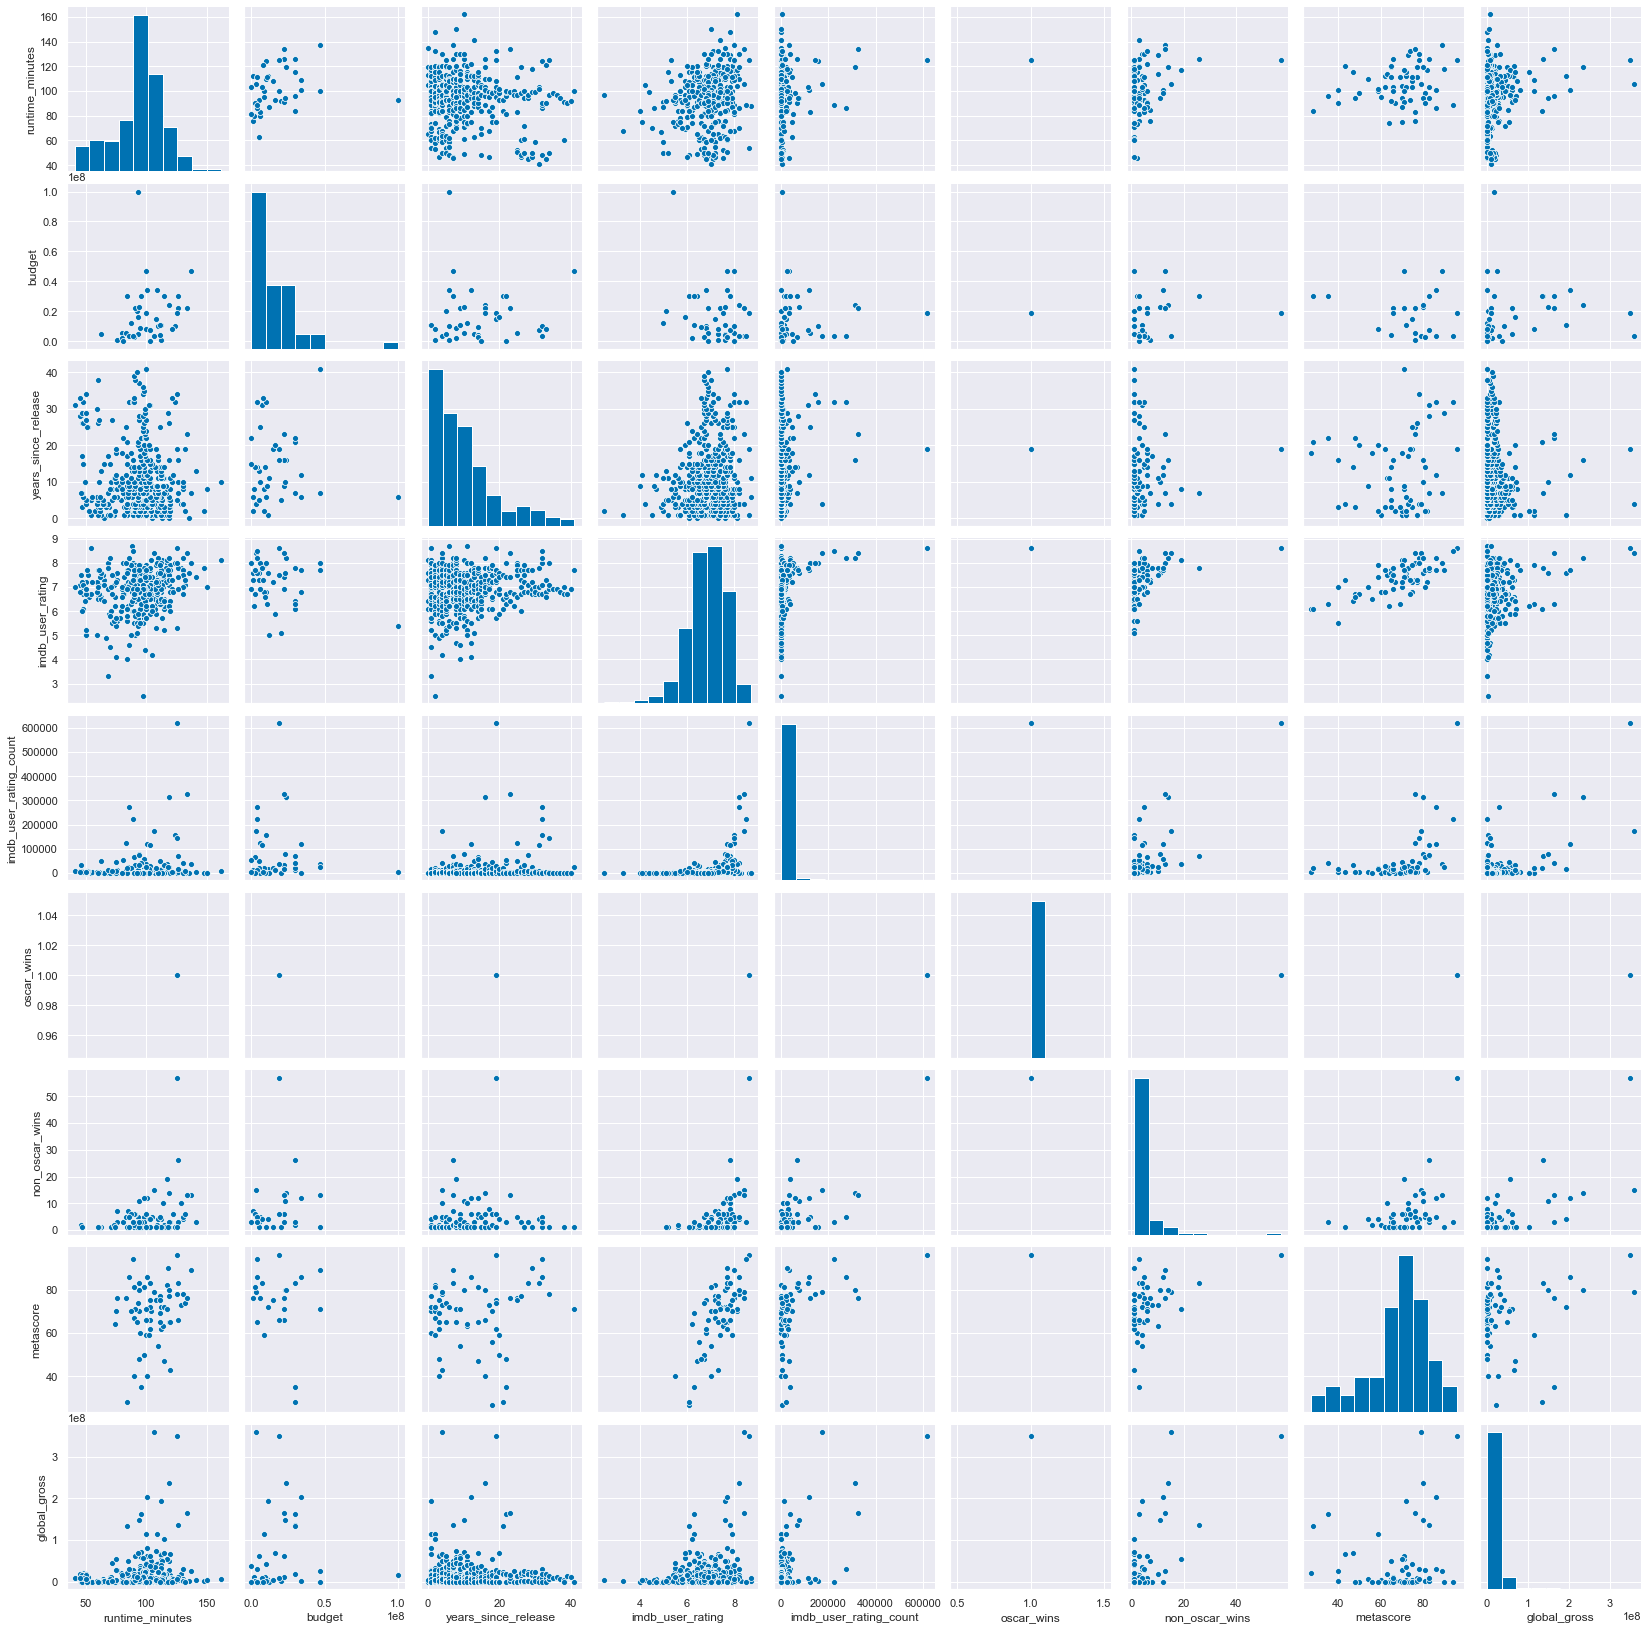

In [117]:
sns.pairplot(japan_df[main_features]);

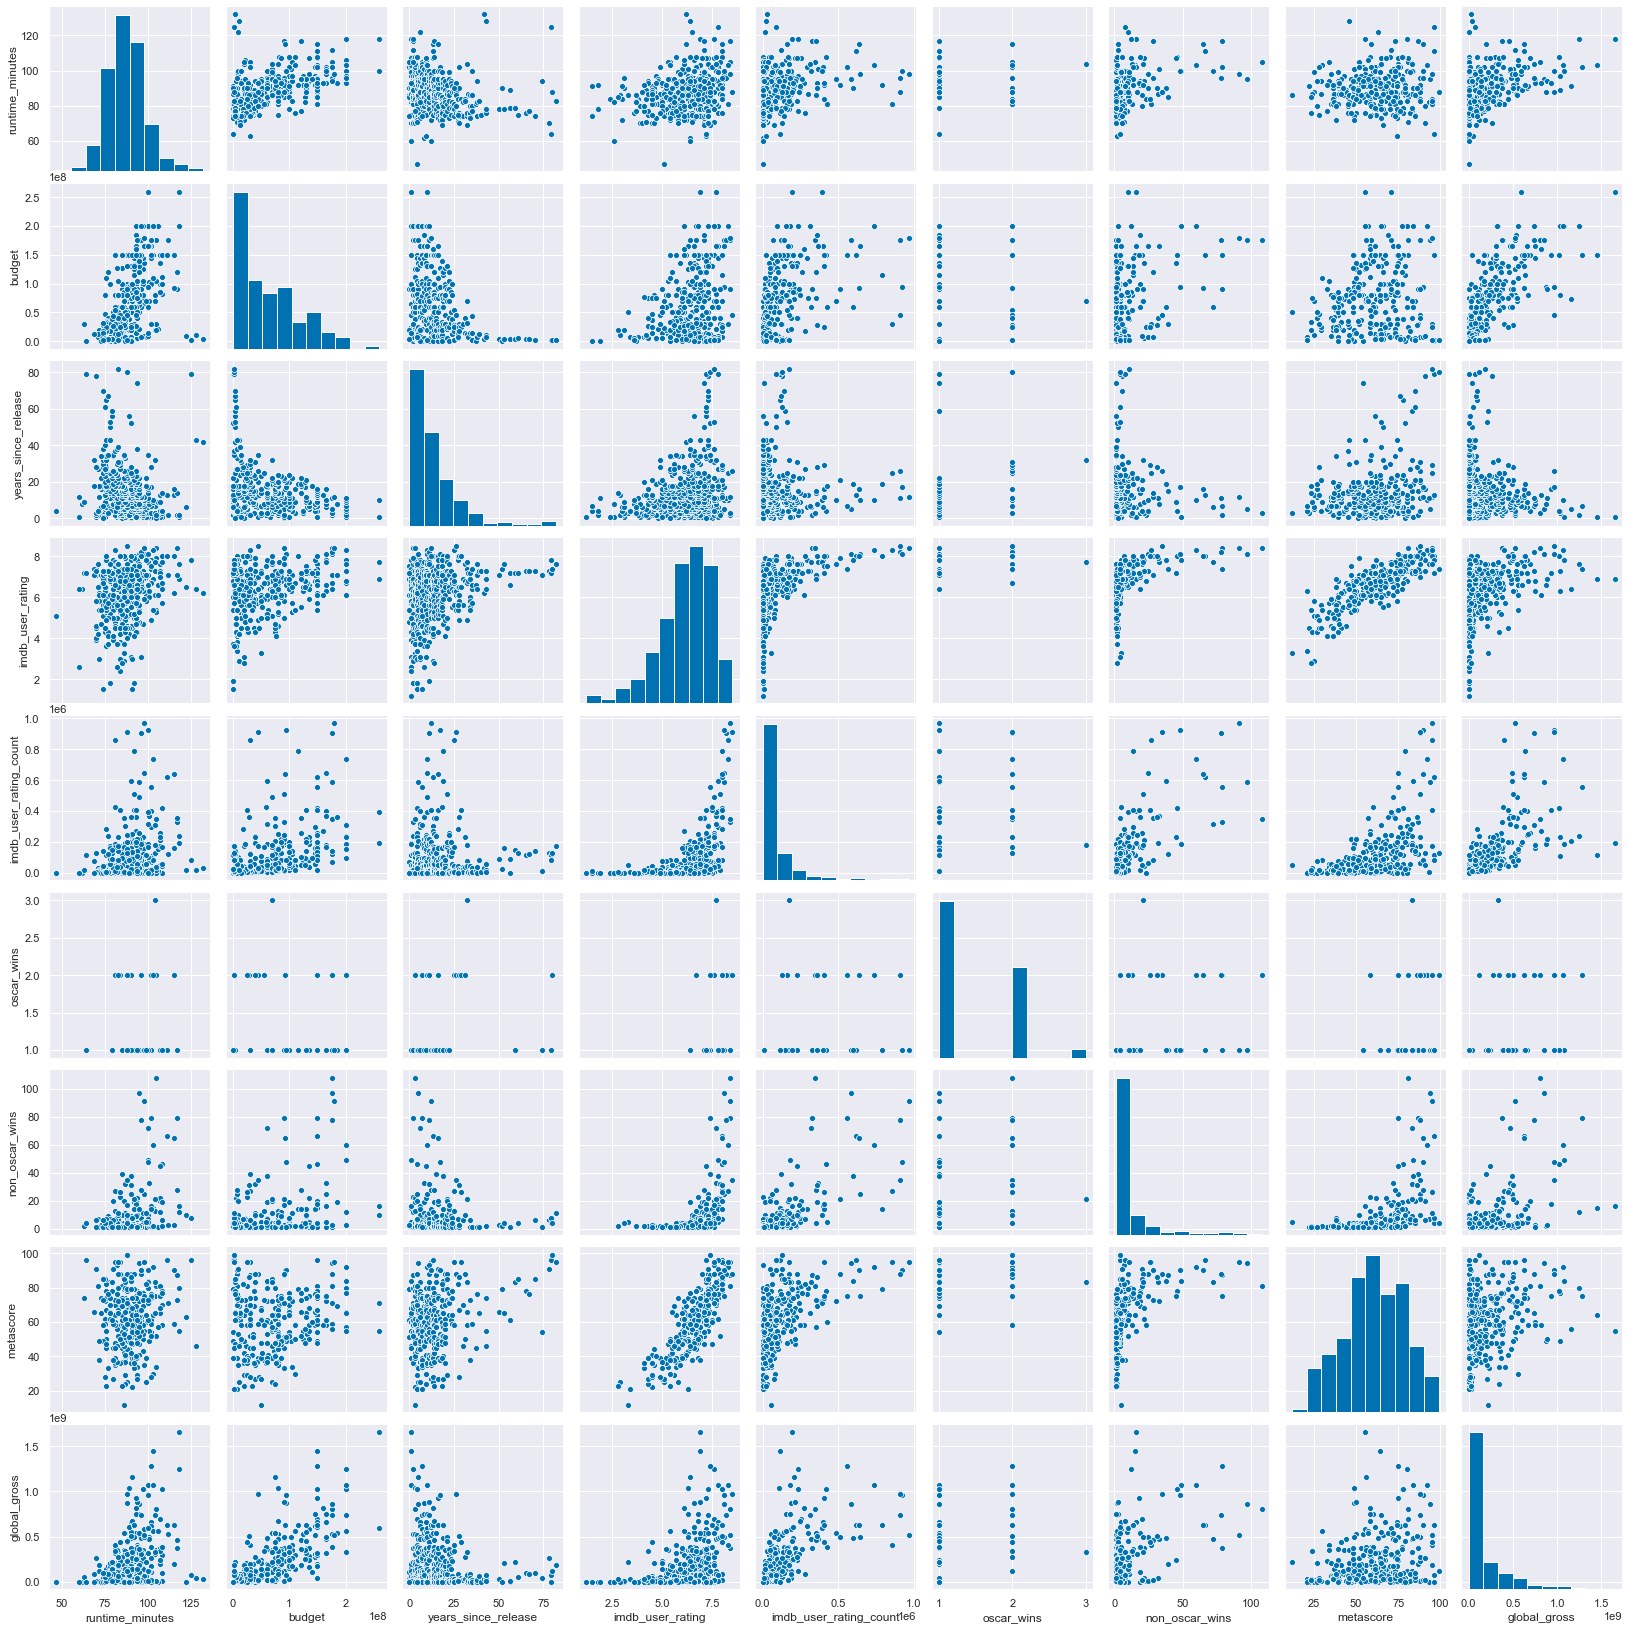

In [118]:
sns.pairplotplot(usa_df[main_features]);

In [177]:
usa_df.runtime_minutes = usa_df.runtime_minutes.fillna(usa_df.runtime_minutes.median())
usa_df.budget = usa_df.budget.fillna(usa_df.budget.median())
usa_df.oscar_wins = usa_df.oscar_wins.fillna(0)
usa_df.non_oscar_wins = usa_df.non_oscar_wins.fillna(0)
usa_df.imdb_user_rating = usa_df.imdb_user_rating.fillna(usa_df.imdb_user_rating.median())
usa_df.imdb_user_rating_count = usa_df.imdb_user_rating_count.fillna(usa_df.imdb_user_rating_count.median())
usa_df.metascore = usa_df.metascore.fillna(usa_df.metascore.median())
usa_df.mpaa_rating = usa_df.mpaa_rating.fillna('No Rating')

In [192]:
japan_df.runtime_minutes = japan_df.runtime_minutes.fillna(japan_df.runtime_minutes.median())
japan_df.budget = japan_df.budget.fillna(japan_df.budget.median())
japan_df.oscar_wins = japan_df.oscar_wins.fillna(0)
japan_df.non_oscar_wins = japan_df.non_oscar_wins.fillna(0)
japan_df.imdb_user_rating = japan_df.imdb_user_rating.fillna(japan_df.imdb_user_rating.median())
japan_df.imdb_user_rating_count = japan_df.imdb_user_rating_count.fillna(japan_df.imdb_user_rating_count.median())
japan_df.metascore = japan_df.metascore.fillna(japan_df.metascore.median())
japan_df.mpaa_rating = japan_df.mpaa_rating.fillna('No Rating')
japan_df.years_since_release = japan_df.years_since_release.fillna(4)

In [188]:
japan_df.metascore.mean()
japan_df.metascore.median()

68.32835820895522

71.0

In [193]:
japan_df[japan_df.title == 'Dragon Force']

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western
360,Dragon Force,Japan,90.0,1.03e+07,29539.0,No Rating,"[Animation, Action, Adventure, Sci-Fi]",6.9,7.0,0.0,0.0,71.0,NaT,4.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [194]:
japan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 2 to 1274
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   496 non-null    object        
 1   country                 496 non-null    object        
 2   runtime_minutes         496 non-null    float64       
 3   budget                  496 non-null    float64       
 4   global_gross            496 non-null    float64       
 5   mpaa_rating             496 non-null    object        
 6   genres                  496 non-null    object        
 7   imdb_user_rating        496 non-null    float64       
 8   imdb_user_rating_count  496 non-null    float64       
 9   oscar_wins              496 non-null    float64       
 10  non_oscar_wins          496 non-null    float64       
 11  metascore               496 non-null    float64       
 12  release_date            491 non-null    datetime6

In [142]:
usa_df.runtime_minutes.median()
usa_df.runtime_minutes.mean()

87.0

87.37552742616033

In [147]:
usa_df.budget.median()

50000000.0

In [170]:
usa_df.imdb_user_rating_count.median()
usa_df.imdb_user_rating_count.mean()

18132.5

80128.09915611814

In [176]:
usa_df.metascore.median()
usa_df.metascore.mean()

61.0

60.67299578059072

In [179]:
usa_df[usa_df.mpaa_rating == 'No Rating']

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western
1440,Elfland,USA,87.0,5.00e+07,4.31e+04,No Rating,[Animation],1.2,11.0,0.0,0.0,61.0,2019-12-03,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1487,Trouble,USA,87.0,5.00e+07,1.08e+07,No Rating,"[Animation, Comedy, Family]",6.1,931.0,0.0,0.0,61.0,2019-08-08,1.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1499,The Lion Kid,USA,82.0,5.00e+07,1.02e+04,No Rating,[Animation],7.2,56.0,0.0,0.0,61.0,2019-07-02,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1505,Norm of the North: King Sized Adventure,USA,90.0,5.00e+07,1.44e+06,No Rating,"[Animation, Adventure, Comedy, Family]",3.1,278.0,0.0,0.0,61.0,2019-08-02,1.0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1509,Shark School,USA,60.0,5.00e+07,5.16e+04,No Rating,[Animation],2.6,18.0,0.0,0.0,61.0,2019-06-04,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,Muhammad: The Last Prophet,USA,95.0,5.00e+07,6.41e+05,No Rating,"[Animation, Biography, Drama, History, War]",7.5,1178.0,0.0,0.0,47.0,2004-11-14,16.0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2582,Gumby: The Movie,USA,90.0,2.80e+06,5.71e+04,No Rating,"[Animation, Adventure, Comedy, Family, Fantasy...",6.3,747.0,0.0,0.0,61.0,1995-12-01,25.0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
2585,Too Outrageous Animation,USA,88.0,5.00e+07,7.24e+03,No Rating,[Animation],6.4,18132.5,0.0,0.0,61.0,1995-03-31,25.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2611,The Tune,USA,69.0,5.00e+07,1.78e+04,No Rating,"[Animation, Comedy, Fantasy, Musical]",7.1,694.0,0.0,0.0,61.0,2002-12-04,18.0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [178]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 1393 to 2836
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   474 non-null    object        
 1   country                 474 non-null    object        
 2   runtime_minutes         474 non-null    float64       
 3   budget                  474 non-null    float64       
 4   global_gross            474 non-null    float64       
 5   mpaa_rating             474 non-null    object        
 6   genres                  474 non-null    object        
 7   imdb_user_rating        474 non-null    float64       
 8   imdb_user_rating_count  474 non-null    float64       
 9   oscar_wins              474 non-null    float64       
 10  non_oscar_wins          474 non-null    float64       
 11  metascore               474 non-null    float64       
 12  release_date            474 non-null    dateti